In [929]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from IPython.display import FileLink

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib.pyplot as plt #collection of functions for scientific and publication-ready visualization

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__))

import seaborn as sns # for visualisation
print("Seaborn version: {}". format(sns.__version__))


#misc libraries
import random
import time

/kaggle/input/global-poverty-and-inequality-data/Global Poverty and Inequality Data.pdf
/kaggle/input/global-poverty-and-inequality-data/global_poverty_inequality_data.csv
/kaggle/input/counties-geographic-coordinates/countries.csv
/kaggle/input/world-population-dataset/world_population.csv
/kaggle/input/global-child-mortality-rate/ChildMOrtalytRate.csv
/kaggle/input/suicide-rate-of-countries-per-every-year/suicideratefemale.csv
/kaggle/input/suicide-rate-of-countries-per-every-year/suicideratemale.csv
/kaggle/input/suicide-rate-of-countries-per-every-year/suiciderateall.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/maternalMortalityRatio.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/neonatalMortalityRate.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/adolescentBirthRate.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/mortalityRateUnsafeWash.csv
/kaggle/input/who-worldhealth-statistics-2020-complete/alcoholSubstanceAbuse.csv
/kaggle/inpu

## Child Mortality Rate File

In [930]:
ChildMortalityRate_dataRaw = pd.read_csv('../input/global-child-mortality-rate/ChildMOrtalytRate.csv')

In [931]:
ChildMortalityRate_dataRaw.head()

,Unnamed: 0,Country,Year,Gender,Child Mortality(1 to 4),Total Population,Mortality Rate
0,0,Afghanistan,1967,Female,26012.0,5080.813,5.119653
1,1,Afghanistan,1968,Female,26192.0,5202.606,5.034400
2,2,Afghanistan,1969,Female,26335.0,5333.936,4.937255
3,3,Afghanistan,1970,Female,26562.0,5476.630,4.850063
4,4,Afghanistan,1971,Female,26671.0,5630.099,4.737217


In [932]:
ChildMortalityRate_dataRaw.tail()

,Unnamed: 0,Country,Year,Gender,Child Mortality(1 to 4),Total Population,Mortality Rate
30935,30935,Zimbabwe,2015,Total,9031.0,13814.642,0.653727
30936,30936,Zimbabwe,2016,Total,8566.0,14030.338,0.610534
30937,30937,Zimbabwe,2017,Total,8318.0,14236.599,0.584269
30938,30938,Zimbabwe,2018,Total,7692.0,14438.812,0.532731
30939,30939,Zimbabwe,2019,Total,7397.0,14645.473,0.505071


In [933]:
ChildMortalityRate_dataRaw.shape

(30940, 7)

In [934]:
ChildMortalityRate_dataRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30940 entries, 0 to 30939
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               30940 non-null  int64  
 1   Country                  30940 non-null  object 
 2   Year                     30940 non-null  int64  
 3   Gender                   30940 non-null  object 
 4   Child Mortality(1 to 4)  30940 non-null  float64
 5   Total Population         30064 non-null  float64
 6   Mortality Rate           30064 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [935]:
ChildMortalityRate_dataRaw.rename(columns={'Unnamed: 0': 'ChildMortalityKey', 'Child Mortality(1 to 4)' : 'ChildMortality'}, inplace=True)

In [936]:
ChildMortalityRate_dataRaw.drop_duplicates()

,ChildMortalityKey,Country,Year,Gender,ChildMortality,Total Population,Mortality Rate
0,0,Afghanistan,1967,Female,26012.0,5080.813,5.119653
1,1,Afghanistan,1968,Female,26192.0,5202.606,5.034400
2,2,Afghanistan,1969,Female,26335.0,5333.936,4.937255
3,3,Afghanistan,1970,Female,26562.0,5476.630,4.850063
4,4,Afghanistan,1971,Female,26671.0,5630.099,4.737217
...,...,...,...,...,...,...,...
30935,30935,Zimbabwe,2015,Total,9031.0,13814.642,0.653727
30936,30936,Zimbabwe,2016,Total,8566.0,14030.338,0.610534
30937,30937,Zimbabwe,2017,Total,8318.0,14236.599,0.584269
30938,30938,Zimbabwe,2018,Total,7692.0,14438.812,0.532731


In [937]:
missing_values_count = ChildMortalityRate_dataRaw.isnull().sum()
missing_values_count

ChildMortalityKey      0
Country                0
Year                   0
Gender                 0
ChildMortality         0
Total Population     876
Mortality Rate       876
dtype: int64

In [938]:
# how many total missing values do we have?
total_cells = np.product(ChildMortalityRate_dataRaw.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

0.8089389601994644

##### we notice that a small percentage of our data has a NA value

In [939]:
ChildMortalityRate_dataRaw.describe()

,ChildMortalityKey,Year,ChildMortality,Total Population,Mortality Rate
count,30940.000000,30940.000000,3.094000e+04,3.006400e+04,30064.000000
mean,15469.500000,1991.456561,1.272722e+04,1.975113e+04,0.959470
std,8931.753001,17.323382,6.370284e+04,8.053780e+04,1.481062
min,0.000000,1955.000000,0.000000e+00,1.606000e+00,0.000000
25%,7734.750000,1978.000000,6.900000e+01,9.928217e+02,0.044134
50%,15469.500000,1993.000000,6.490000e+02,3.890678e+03,0.225487
75%,23204.250000,2006.000000,6.499500e+03,1.175135e+04,1.292107
max,30939.000000,2019.000000,1.463821e+06,1.433784e+06,10.878031


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Mortality Rate'>

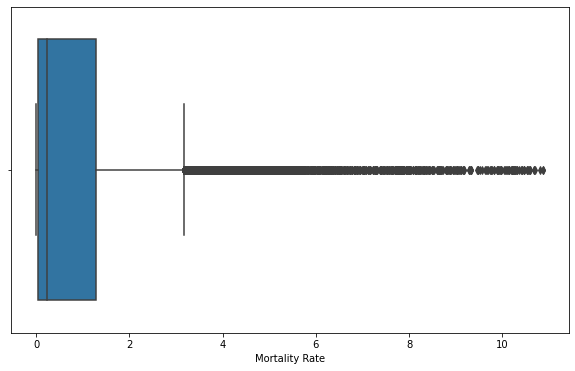

In [940]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(ChildMortalityRate_dataRaw['Mortality Rate'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Population', ylabel='Density'>

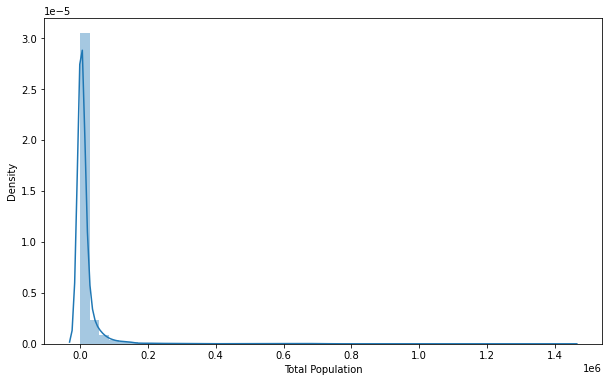

In [941]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(ChildMortalityRate_dataRaw['Total Population'])

#### Replacing missing values

In [942]:
ChildMortalityRate_dataRaw['Total Population'] = ChildMortalityRate_dataRaw['Total Population'].fillna(ChildMortalityRate_dataRaw['Total Population'].mean())
ChildMortalityRate_dataRaw['Mortality Rate'] = ChildMortalityRate_dataRaw['Mortality Rate'].fillna(ChildMortalityRate_dataRaw['Mortality Rate'].mean())

In [943]:
ChildMortalityRate_dataRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30940 entries, 0 to 30939
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ChildMortalityKey  30940 non-null  int64  
 1   Country            30940 non-null  object 
 2   Year               30940 non-null  int64  
 3   Gender             30940 non-null  object 
 4   ChildMortality     30940 non-null  float64
 5   Total Population   30940 non-null  float64
 6   Mortality Rate     30940 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [944]:
ChildMortalityRate_dataRaw.rename(columns={'Total Population': 'TotalPopulation', 'Mortality Rate' : 'MortalityRate'}, inplace=True)

In [945]:
ChildMortalityRate_dataRaw.head()

,ChildMortalityKey,Country,Year,Gender,ChildMortality,TotalPopulation,MortalityRate
0,0,Afghanistan,1967,Female,26012.0,5080.813,5.119653
1,1,Afghanistan,1968,Female,26192.0,5202.606,5.034400
2,2,Afghanistan,1969,Female,26335.0,5333.936,4.937255
3,3,Afghanistan,1970,Female,26562.0,5476.630,4.850063
4,4,Afghanistan,1971,Female,26671.0,5630.099,4.737217


In [946]:
ChildMortalityRate_dataRaw.dtypes

ChildMortalityKey      int64
Country               object
Year                   int64
Gender                object
ChildMortality       float64
TotalPopulation      float64
MortalityRate        float64
dtype: object

In [947]:
ChildMortalityRate_dataRaw.drop('ChildMortalityKey', inplace=True, axis=1)

In [948]:
def add_id_column(df, columnName):
    df.insert(0, columnName, (df.index)+1)

In [949]:
add_id_column(ChildMortalityRate_dataRaw, 'ChildMortalityID')

In [950]:
# Generate a csv file
ChildMortalityRate_dataRaw.to_csv('ChildMortalityRate.csv', encoding='utf-8', index=False)

### This file is now ready !!

In [951]:
# let's import it to our output space
import os
os.chdir(r'/kaggle/working')
FileLink(r'ChildMortalityRate.csv')

/kaggle/working/ChildMortalityRate.csv

## Country Data File

In [952]:
CountryData = pd.read_csv('../input/counties-geographic-coordinates/countries.csv')

In [953]:
CountryData.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [954]:
CountryData.tail()

,country,latitude,longitude,name
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia
244,ZW,-19.015438,29.154857,Zimbabwe


In [955]:
CountryData.shape

(245, 4)

In [956]:
CountryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    244 non-null    object 
 1   latitude   244 non-null    float64
 2   longitude  244 non-null    float64
 3   name       245 non-null    object 
dtypes: float64(2), object(2)
memory usage: 7.8+ KB


In [957]:
missing_values_count = CountryData.isnull().sum()
missing_values_count

country      1
latitude     1
longitude    1
name         0
dtype: int64

##### we can just drop the NaN value since we only have one

In [958]:
# remove all the rows that contain a missing values
CountryData.dropna()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [959]:
CountryData = CountryData.rename(columns=str.capitalize)

In [960]:
CountryData.rename(columns={'Country' : 'Code', 'Name' : 'Country'}, inplace=True)

In [961]:
add_id_column(CountryData, 'CountryKey')

In [962]:
CountryData.head()

,CountryKey,Code,Latitude,Longitude,Country
0,1,AD,42.546245,1.601554,Andorra
1,2,AE,23.424076,53.847818,United Arab Emirates
2,3,AF,33.939110,67.709953,Afghanistan
3,4,AG,17.060816,-61.796428,Antigua and Barbuda
4,5,AI,18.220554,-63.068615,Anguilla


#### Our File is now ready !!

In [963]:
# Generate a csv file
CountryData.to_csv('CountryData.csv', encoding='utf-8')

In [964]:
# let's import it to our output space
import os
os.chdir(r'/kaggle/working')
FileLink(r'CountryData.csv')

/kaggle/working/CountryData.csv

## Population File

In [965]:
PopulationData = pd.read_csv('../input/world-population-dataset/world_population.csv')

In [966]:
PopulationData.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [967]:
PopulationData.tail()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25
233,74,ZWE,Zimbabwe,Harare,Africa,16320537,15669666,14154937,12839771,11834676,10113893,7049926,5202918,390757,41.7665,1.0204,0.20


In [968]:
PopulationData.shape

(234, 17)

In [969]:
PopulationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [970]:
PopulationData.rename(columns={'CCA3' : 'Code', 'Country/Territory' : 'Country', 'Growth Rate' : 'GrowthRate', 'World Population Percentage' : 'WorldPopulationPercentage'}, inplace=True)

In [971]:
PopulationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rank                       234 non-null    int64  
 1   Code                       234 non-null    object 
 2   Country                    234 non-null    object 
 3   Capital                    234 non-null    object 
 4   Continent                  234 non-null    object 
 5   2022 Population            234 non-null    int64  
 6   2020 Population            234 non-null    int64  
 7   2015 Population            234 non-null    int64  
 8   2010 Population            234 non-null    int64  
 9   2000 Population            234 non-null    int64  
 10  1990 Population            234 non-null    int64  
 11  1980 Population            234 non-null    int64  
 12  1970 Population            234 non-null    int64  
 13  Area (km²)                 234 non-null    int64  

#### There is no missing values 

In [972]:
PopulationData.head()

,Rank,Code,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),GrowthRate,WorldPopulationPercentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [973]:
PopulationData.drop(columns=['2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population'], axis=1, inplace=True)

In [974]:
PopulationData.rename(columns={'2022 Population' : 'Population'}, inplace=True)

In [975]:
PopulationData.head()

,Rank,Code,Country,Capital,Continent,Population,Area (km²),Density (per km²),GrowthRate,WorldPopulationPercentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,468,170.5641,1.0100,0.00


In [976]:
missing_values_count = PopulationData.isnull().sum()
missing_values_count

Rank                         0
Code                         0
Country                      0
Capital                      0
Continent                    0
Population                   0
Area (km²)                   0
Density (per km²)            0
GrowthRate                   0
WorldPopulationPercentage    0
dtype: int64

In [977]:
add_id_column(PopulationData, 'PopulationID')

In [978]:
PopulationData.head()

,PopulationID,Rank,Code,Country,Capital,Continent,Population,Area (km²),Density (per km²),GrowthRate,WorldPopulationPercentage
0,1,36,AFG,Afghanistan,Kabul,Asia,41128771,652230,63.0587,1.0257,0.52
1,2,138,ALB,Albania,Tirana,Europe,2842321,28748,98.8702,0.9957,0.04
2,3,34,DZA,Algeria,Algiers,Africa,44903225,2381741,18.8531,1.0164,0.56
3,4,213,ASM,American Samoa,Pago Pago,Oceania,44273,199,222.4774,0.9831,0.00
4,5,203,AND,Andorra,Andorra la Vella,Europe,79824,468,170.5641,1.0100,0.00


In [979]:
# Generate a csv file
PopulationData.to_csv('PopulationData.csv', encoding='utf-8', index=False)

In [980]:
# let's import it to our output space
import os
os.chdir(r'/kaggle/working')
FileLink(r'PopulationData.csv')

/kaggle/working/PopulationData.csv

## Suicide Data File

In [981]:
SuicideData =pd.read_csv('../input/who-worldhealth-statistics-2020-complete/crudeSuicideRates.csv')

In [982]:
SuicideData.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2016,Crude suicide rates (per 100 000 population),Both sexes,0.0
1,Afghanistan,2016,Crude suicide rates (per 100 000 population),Male,0.0
2,Afghanistan,2016,Crude suicide rates (per 100 000 population),Female,0.0
3,Afghanistan,2015,Crude suicide rates (per 100 000 population),Both sexes,4.8
4,Afghanistan,2015,Crude suicide rates (per 100 000 population),Male,7.8


In [983]:
SuicideData.tail()

,Location,Period,Indicator,Dim1,First Tooltip
2740,Zimbabwe,2005,Crude suicide rates (per 100 000 population),Male,21.7
2741,Zimbabwe,2005,Crude suicide rates (per 100 000 population),Female,6.4
2742,Zimbabwe,2000,Crude suicide rates (per 100 000 population),Both sexes,12.9
2743,Zimbabwe,2000,Crude suicide rates (per 100 000 population),Male,20.6
2744,Zimbabwe,2000,Crude suicide rates (per 100 000 population),Female,5.5


In [984]:
SuicideData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745 entries, 0 to 2744
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       2745 non-null   object 
 1   Period         2745 non-null   int64  
 2   Indicator      2745 non-null   object 
 3   Dim1           2745 non-null   object 
 4   First Tooltip  2745 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 107.4+ KB


In [985]:
missing_values_count = SuicideData.isnull().sum()
missing_values_count

Location         0
Period           0
Indicator        0
Dim1             0
First Tooltip    0
dtype: int64

In [986]:
SuicideData.rename(columns={'Location' : 'Country', 'Dim1' : 'Gender', 'First Tooltip' : 'SuicideRate'}, inplace=True)

In [987]:
SuicideData.head()

,Country,Period,Indicator,Gender,SuicideRate
0,Afghanistan,2016,Crude suicide rates (per 100 000 population),Both sexes,0.0
1,Afghanistan,2016,Crude suicide rates (per 100 000 population),Male,0.0
2,Afghanistan,2016,Crude suicide rates (per 100 000 population),Female,0.0
3,Afghanistan,2015,Crude suicide rates (per 100 000 population),Both sexes,4.8
4,Afghanistan,2015,Crude suicide rates (per 100 000 population),Male,7.8


In [988]:
add_id_column(SuicideData, 'SuicideKey')

In [989]:
SuicideData

,SuicideKey,Country,Period,Indicator,Gender,SuicideRate
0,1,Afghanistan,2016,Crude suicide rates (per 100 000 population),Both sexes,0.0
1,2,Afghanistan,2016,Crude suicide rates (per 100 000 population),Male,0.0
2,3,Afghanistan,2016,Crude suicide rates (per 100 000 population),Female,0.0
3,4,Afghanistan,2015,Crude suicide rates (per 100 000 population),Both sexes,4.8
4,5,Afghanistan,2015,Crude suicide rates (per 100 000 population),Male,7.8
...,...,...,...,...,...,...
2740,2741,Zimbabwe,2005,Crude suicide rates (per 100 000 population),Male,21.7
2741,2742,Zimbabwe,2005,Crude suicide rates (per 100 000 population),Female,6.4
2742,2743,Zimbabwe,2000,Crude suicide rates (per 100 000 population),Both sexes,12.9
2743,2744,Zimbabwe,2000,Crude suicide rates (per 100 000 population),Male,20.6


In [990]:
SuicideData.drop_duplicates

<bound method DataFrame.drop_duplicates of       SuicideKey      Country  Period  \
0              1  Afghanistan    2016   
1              2  Afghanistan    2016   
2              3  Afghanistan    2016   
3              4  Afghanistan    2015   
4              5  Afghanistan    2015   
...          ...          ...     ...   
2740        2741     Zimbabwe    2005   
2741        2742     Zimbabwe    2005   
2742        2743     Zimbabwe    2000   
2743        2744     Zimbabwe    2000   
2744        2745     Zimbabwe    2000   

                                         Indicator      Gender  SuicideRate  
0     Crude suicide rates (per 100 000 population)  Both sexes          0.0  
1     Crude suicide rates (per 100 000 population)        Male          0.0  
2     Crude suicide rates (per 100 000 population)      Female          0.0  
3     Crude suicide rates (per 100 000 population)  Both sexes          4.8  
4     Crude suicide rates (per 100 000 population)        Male          7.

In [991]:
SuicideData

,SuicideKey,Country,Period,Indicator,Gender,SuicideRate
0,1,Afghanistan,2016,Crude suicide rates (per 100 000 population),Both sexes,0.0
1,2,Afghanistan,2016,Crude suicide rates (per 100 000 population),Male,0.0
2,3,Afghanistan,2016,Crude suicide rates (per 100 000 population),Female,0.0
3,4,Afghanistan,2015,Crude suicide rates (per 100 000 population),Both sexes,4.8
4,5,Afghanistan,2015,Crude suicide rates (per 100 000 population),Male,7.8
...,...,...,...,...,...,...
2740,2741,Zimbabwe,2005,Crude suicide rates (per 100 000 population),Male,21.7
2741,2742,Zimbabwe,2005,Crude suicide rates (per 100 000 population),Female,6.4
2742,2743,Zimbabwe,2000,Crude suicide rates (per 100 000 population),Both sexes,12.9
2743,2744,Zimbabwe,2000,Crude suicide rates (per 100 000 population),Male,20.6


In [992]:
# Generate a csv file
SuicideData.to_csv('SuicideData.csv', encoding='utf-8', index=False)

In [993]:
# Generate a csv file
SuicideData.to_csv('SuicideData.csv', encoding='utf-8', index=False)

In [994]:
# let's import it to our output space
import os
os.chdir(r'/kaggle/working')
FileLink(r'SuicideData.csv')

/kaggle/working/SuicideData.csv

## Hunger Data File

In [995]:
HungerData = pd.read_csv('../input/the-global-hunger-index/global-hunger-index.csv')

In [996]:
HungerData.head()

,Entity,Code,Year,Global Hunger Index (2021),411773-annotations
0,Afghanistan,AFG,2000,50.9,NaN
1,Afghanistan,AFG,2006,42.7,NaN
2,Afghanistan,AFG,2012,34.3,NaN
3,Afghanistan,AFG,2021,28.3,NaN
4,Albania,ALB,2000,20.7,NaN


In [997]:
HungerData.shape

(471, 5)

In [998]:
HungerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Entity                      471 non-null    object 
 1   Code                        471 non-null    object 
 2   Year                        471 non-null    int64  
 3   Global Hunger Index (2021)  471 non-null    float64
 4   411773-annotations          12 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 18.5+ KB


In [999]:
HungerData.rename(columns={'Entity' : 'Country', 'Global Hunger Index (2021)' : 'HungerIndex'}, inplace=True)

In [1000]:
HungerData

,Country,Code,Year,HungerIndex,411773-annotations
0,Afghanistan,AFG,2000,50.9,NaN
1,Afghanistan,AFG,2006,42.7,NaN
2,Afghanistan,AFG,2012,34.3,NaN
3,Afghanistan,AFG,2021,28.3,NaN
4,Albania,ALB,2000,20.7,NaN
...,...,...,...,...,...
466,Yemen,YEM,2006,38.8,NaN
467,Yemen,YEM,2012,38.4,NaN
468,Yemen,YEM,2021,45.1,NaN
469,Zambia,ZMB,2021,27.5,Value represents the mid-point of its group in...


In [1001]:
HungerData.drop(columns=['411773-annotations'], axis=1, inplace=True)

In [1002]:
HungerData

,Country,Code,Year,HungerIndex
0,Afghanistan,AFG,2000,50.9
1,Afghanistan,AFG,2006,42.7
2,Afghanistan,AFG,2012,34.3
3,Afghanistan,AFG,2021,28.3
4,Albania,ALB,2000,20.7
...,...,...,...,...
466,Yemen,YEM,2006,38.8
467,Yemen,YEM,2012,38.4
468,Yemen,YEM,2021,45.1
469,Zambia,ZMB,2021,27.5


In [1003]:
add_id_column(HungerData, 'HungerKey')

In [1004]:
HungerData

,HungerKey,Country,Code,Year,HungerIndex
0,1,Afghanistan,AFG,2000,50.9
1,2,Afghanistan,AFG,2006,42.7
2,3,Afghanistan,AFG,2012,34.3
3,4,Afghanistan,AFG,2021,28.3
4,5,Albania,ALB,2000,20.7
...,...,...,...,...,...
466,467,Yemen,YEM,2006,38.8
467,468,Yemen,YEM,2012,38.4
468,469,Yemen,YEM,2021,45.1
469,470,Zambia,ZMB,2021,27.5


In [1005]:
# Generate a csv file
HungerData.to_csv('HungerData.csv', encoding='utf-8', index=False)

In [1006]:
# let's import it to our output space
import os
os.chdir(r'/kaggle/working')
FileLink(r'HungerData.csv')

/kaggle/working/HungerData.csv

## Health Coverage Data

In [1007]:
DoctorsData = pd.read_csv('../input/who-worldhealth-statistics-2020-complete/medicalDoctors.csv')
UhcCoverageData = pd.read_csv('../input/who-worldhealth-statistics-2020-complete/uhcCoverage.csv')
PharmacistsData = pd.read_csv('../input/who-worldhealth-statistics-2020-complete/pharmacists.csv')
DentistsData = pd.read_csv('../input/who-worldhealth-statistics-2020-complete/dentists.csv')

In [1008]:
DoctorsData.head()

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2016,"Medical doctors (per 10,000)",2.78
1,Afghanistan,2015,"Medical doctors (per 10,000)",2.85
2,Afghanistan,2014,"Medical doctors (per 10,000)",2.98
3,Afghanistan,2013,"Medical doctors (per 10,000)",2.85
4,Afghanistan,2012,"Medical doctors (per 10,000)",2.41


In [1009]:
DoctorsData.shape

(2506, 4)

In [1010]:
DoctorsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       2506 non-null   object 
 1   Period         2506 non-null   int64  
 2   Indicator      2506 non-null   object 
 3   First Tooltip  2506 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 78.4+ KB


In [1011]:
DoctorsData.rename(columns={'Location' : 'Country', 'Period' : 'Year', 'First Tooltip' : 'DoctorsPer10.000'}, inplace=True)

In [1012]:
DoctorsData

,Country,Year,Indicator,DoctorsPer10.000
0,Afghanistan,2016,"Medical doctors (per 10,000)",2.78
1,Afghanistan,2015,"Medical doctors (per 10,000)",2.85
2,Afghanistan,2014,"Medical doctors (per 10,000)",2.98
3,Afghanistan,2013,"Medical doctors (per 10,000)",2.85
4,Afghanistan,2012,"Medical doctors (per 10,000)",2.41
...,...,...,...,...
2501,Zimbabwe,2005,"Medical doctors (per 10,000)",1.26
2502,Zimbabwe,2004,"Medical doctors (per 10,000)",1.74
2503,Zimbabwe,2000,"Medical doctors (per 10,000)",1.26
2504,Zimbabwe,1995,"Medical doctors (per 10,000)",1.43


In [1013]:
UhcCoverageData

,Location,Indicator,Period,First Tooltip
0,Afghanistan,UHC index of essential service coverage,2017,37
1,Afghanistan,UHC index of essential service coverage,2015,34
2,Albania,UHC index of essential service coverage,2017,59
3,Albania,UHC index of essential service coverage,2015,58
4,Algeria,UHC index of essential service coverage,2017,78
...,...,...,...,...
361,Yemen,UHC index of essential service coverage,2015,40
362,Zambia,UHC index of essential service coverage,2017,53
363,Zambia,UHC index of essential service coverage,2015,54
364,Zimbabwe,UHC index of essential service coverage,2017,54


In [1014]:
UhcCoverageData.rename(columns={'Location' : 'Country', 'Period' : 'Year', 'First Tooltip' : 'UhcCoveragePer10.000'}, inplace=True)

In [1015]:
UhcCoverageData

,Country,Indicator,Year,UhcCoveragePer10.000
0,Afghanistan,UHC index of essential service coverage,2017,37
1,Afghanistan,UHC index of essential service coverage,2015,34
2,Albania,UHC index of essential service coverage,2017,59
3,Albania,UHC index of essential service coverage,2015,58
4,Algeria,UHC index of essential service coverage,2017,78
...,...,...,...,...
361,Yemen,UHC index of essential service coverage,2015,40
362,Zambia,UHC index of essential service coverage,2017,53
363,Zambia,UHC index of essential service coverage,2015,54
364,Zimbabwe,UHC index of essential service coverage,2017,54


In [1016]:
UhcCoverageData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               366 non-null    object
 1   Indicator             366 non-null    object
 2   Year                  366 non-null    int64 
 3   UhcCoveragePer10.000  366 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.6+ KB


In [1017]:
PharmacistsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       1795 non-null   object 
 1   Period         1795 non-null   int64  
 2   Indicator      1795 non-null   object 
 3   First Tooltip  1795 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 56.2+ KB


In [1018]:
PharmacistsData.rename(columns={'Location' : 'Country', 'Period' : 'Year', 'First Tooltip' : 'PharmacistsPer10.000'}, inplace=True)

In [1019]:
PharmacistsData

,Country,Year,Indicator,PharmacistsPer10.000
0,Afghanistan,2016,"Pharmacists (per 10,000)",0.470
1,Afghanistan,2015,"Pharmacists (per 10,000)",0.500
2,Afghanistan,2014,"Pharmacists (per 10,000)",0.510
3,Afghanistan,2012,"Pharmacists (per 10,000)",0.270
4,Afghanistan,2011,"Pharmacists (per 10,000)",0.280
...,...,...,...,...
1790,Zimbabwe,2010,"Pharmacists (per 10,000)",0.043
1791,Zimbabwe,2009,"Pharmacists (per 10,000)",0.540
1792,Zimbabwe,2004,"Pharmacists (per 10,000)",0.500
1793,Zimbabwe,1995,"Pharmacists (per 10,000)",0.440


In [1020]:
DentistsData

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2016,"Dentists (per 10,000)",0.034
1,Afghanistan,2015,"Dentists (per 10,000)",0.036
2,Afghanistan,2014,"Dentists (per 10,000)",0.033
3,Afghanistan,2008,"Dentists (per 10,000)",0.140
4,Afghanistan,2007,"Dentists (per 10,000)",0.120
...,...,...,...,...
2129,Zimbabwe,2009,"Dentists (per 10,000)",0.150
2130,Zimbabwe,2008,"Dentists (per 10,000)",0.150
2131,Zimbabwe,2007,"Dentists (per 10,000)",0.160
2132,Zimbabwe,1995,"Dentists (per 10,000)",0.130


In [1021]:
DentistsData.rename(columns={'Location' : 'Country', 'Period' : 'Year', 'First Tooltip' : 'DentistsPer10.000'}, inplace=True)

In [1022]:
DentistsData

,Country,Year,Indicator,DentistsPer10.000
0,Afghanistan,2016,"Dentists (per 10,000)",0.034
1,Afghanistan,2015,"Dentists (per 10,000)",0.036
2,Afghanistan,2014,"Dentists (per 10,000)",0.033
3,Afghanistan,2008,"Dentists (per 10,000)",0.140
4,Afghanistan,2007,"Dentists (per 10,000)",0.120
...,...,...,...,...
2129,Zimbabwe,2009,"Dentists (per 10,000)",0.150
2130,Zimbabwe,2008,"Dentists (per 10,000)",0.150
2131,Zimbabwe,2007,"Dentists (per 10,000)",0.160
2132,Zimbabwe,1995,"Dentists (per 10,000)",0.130


In [1023]:
DentistsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            2134 non-null   object 
 1   Year               2134 non-null   int64  
 2   Indicator          2134 non-null   object 
 3   DentistsPer10.000  2134 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 66.8+ KB


In [1024]:
UhcCoverageData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               366 non-null    object
 1   Indicator             366 non-null    object
 2   Year                  366 non-null    int64 
 3   UhcCoveragePer10.000  366 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.6+ KB


In [1025]:
HealthCoverageData1 = pd.merge(DoctorsData, UhcCoverageData, left_on = ["Country","Year"], right_on = ["Country", "Year"], how='left')
HealthCoverageData2 = pd.merge(DentistsData, PharmacistsData, left_on = ["Country","Year"], right_on = ["Country", "Year"], how='left')

In [1026]:
HealthCoverageData1

,Country,Year,Indicator_x,DoctorsPer10.000,Indicator_y,UhcCoveragePer10.000
0,Afghanistan,2016,"Medical doctors (per 10,000)",2.78,NaN,NaN
1,Afghanistan,2015,"Medical doctors (per 10,000)",2.85,UHC index of essential service coverage,34.0
2,Afghanistan,2014,"Medical doctors (per 10,000)",2.98,NaN,NaN
3,Afghanistan,2013,"Medical doctors (per 10,000)",2.85,NaN,NaN
4,Afghanistan,2012,"Medical doctors (per 10,000)",2.41,NaN,NaN
...,...,...,...,...,...,...
2501,Zimbabwe,2005,"Medical doctors (per 10,000)",1.26,NaN,NaN
2502,Zimbabwe,2004,"Medical doctors (per 10,000)",1.74,NaN,NaN
2503,Zimbabwe,2000,"Medical doctors (per 10,000)",1.26,NaN,NaN
2504,Zimbabwe,1995,"Medical doctors (per 10,000)",1.43,NaN,NaN


In [1027]:
HealthCoverageData2

,Country,Year,Indicator_x,DentistsPer10.000,Indicator_y,PharmacistsPer10.000
0,Afghanistan,2016,"Dentists (per 10,000)",0.034,"Pharmacists (per 10,000)",0.47
1,Afghanistan,2015,"Dentists (per 10,000)",0.036,"Pharmacists (per 10,000)",0.50
2,Afghanistan,2014,"Dentists (per 10,000)",0.033,"Pharmacists (per 10,000)",0.51
3,Afghanistan,2008,"Dentists (per 10,000)",0.140,"Pharmacists (per 10,000)",0.30
4,Afghanistan,2007,"Dentists (per 10,000)",0.120,"Pharmacists (per 10,000)",0.31
...,...,...,...,...,...,...
2129,Zimbabwe,2009,"Dentists (per 10,000)",0.150,"Pharmacists (per 10,000)",0.54
2130,Zimbabwe,2008,"Dentists (per 10,000)",0.150,NaN,NaN
2131,Zimbabwe,2007,"Dentists (per 10,000)",0.160,NaN,NaN
2132,Zimbabwe,1995,"Dentists (per 10,000)",0.130,"Pharmacists (per 10,000)",0.44


In [1028]:
HealthCoverageData = pd.merge(HealthCoverageData1, HealthCoverageData2, left_on = ["Country","Year"], right_on = ["Country", "Year"], how='left')

In [1029]:
HealthCoverageData

,Country,Year,Indicator_x_x,DoctorsPer10.000,Indicator_y_x,UhcCoveragePer10.000,Indicator_x_y,DentistsPer10.000,Indicator_y_y,PharmacistsPer10.000
0,Afghanistan,2016,"Medical doctors (per 10,000)",2.78,NaN,NaN,"Dentists (per 10,000)",0.034,"Pharmacists (per 10,000)",0.47
1,Afghanistan,2015,"Medical doctors (per 10,000)",2.85,UHC index of essential service coverage,34.0,"Dentists (per 10,000)",0.036,"Pharmacists (per 10,000)",0.50
2,Afghanistan,2014,"Medical doctors (per 10,000)",2.98,NaN,NaN,"Dentists (per 10,000)",0.033,"Pharmacists (per 10,000)",0.51
3,Afghanistan,2013,"Medical doctors (per 10,000)",2.85,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,"Medical doctors (per 10,000)",2.41,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2501,Zimbabwe,2005,"Medical doctors (per 10,000)",1.26,NaN,NaN,NaN,NaN,NaN,NaN
2502,Zimbabwe,2004,"Medical doctors (per 10,000)",1.74,NaN,NaN,NaN,NaN,NaN,NaN
2503,Zimbabwe,2000,"Medical doctors (per 10,000)",1.26,NaN,NaN,NaN,NaN,NaN,NaN
2504,Zimbabwe,1995,"Medical doctors (per 10,000)",1.43,NaN,NaN,"Dentists (per 10,000)",0.130,"Pharmacists (per 10,000)",0.44


In [1030]:
HealthCoverageData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506 entries, 0 to 2505
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2506 non-null   object 
 1   Year                  2506 non-null   int64  
 2   Indicator_x_x         2506 non-null   object 
 3   DoctorsPer10.000      2506 non-null   float64
 4   Indicator_y_x         202 non-null    object 
 5   UhcCoveragePer10.000  202 non-null    float64
 6   Indicator_x_y         1969 non-null   object 
 7   DentistsPer10.000     1969 non-null   float64
 8   Indicator_y_y         1535 non-null   object 
 9   PharmacistsPer10.000  1535 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 215.4+ KB


In [1031]:
HealthCoverageData.drop(columns=['Indicator_x_x', 'Indicator_y_x', 'Indicator_x_y', 'Indicator_y_y'], axis=1, inplace=True)

In [1032]:
HealthCoverageData

,Country,Year,DoctorsPer10.000,UhcCoveragePer10.000,DentistsPer10.000,PharmacistsPer10.000
0,Afghanistan,2016,2.78,NaN,0.034,0.47
1,Afghanistan,2015,2.85,34.0,0.036,0.50
2,Afghanistan,2014,2.98,NaN,0.033,0.51
3,Afghanistan,2013,2.85,NaN,NaN,NaN
4,Afghanistan,2012,2.41,NaN,NaN,NaN
...,...,...,...,...,...,...
2501,Zimbabwe,2005,1.26,NaN,NaN,NaN
2502,Zimbabwe,2004,1.74,NaN,NaN,NaN
2503,Zimbabwe,2000,1.26,NaN,NaN,NaN
2504,Zimbabwe,1995,1.43,NaN,0.130,0.44


In [1033]:
HealthCoverageData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506 entries, 0 to 2505
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2506 non-null   object 
 1   Year                  2506 non-null   int64  
 2   DoctorsPer10.000      2506 non-null   float64
 3   UhcCoveragePer10.000  202 non-null    float64
 4   DentistsPer10.000     1969 non-null   float64
 5   PharmacistsPer10.000  1535 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 137.0+ KB


In [1034]:
missing_values_count = HealthCoverageData.isnull().sum()
missing_values_count

Country                    0
Year                       0
DoctorsPer10.000           0
UhcCoveragePer10.000    2304
DentistsPer10.000        537
PharmacistsPer10.000     971
dtype: int64

In [1035]:
HealthCoverageData.describe()

,Year,DoctorsPer10.000,UhcCoveragePer10.000,DentistsPer10.000,PharmacistsPer10.000
count,2506.000000,2506.000000,202.000000,1969.000000,1535.000000
mean,2006.184757,20.685012,67.089109,4.101534,4.267907
std,7.483407,14.299267,14.684136,3.189003,3.632885
min,1990.000000,0.130000,27.000000,0.001000,0.002000
25%,2001.000000,7.782500,60.000000,1.330000,0.945000
50%,2007.000000,21.280000,71.000000,3.550000,3.840000
75%,2012.000000,31.660000,78.000000,6.680000,6.475000
max,2018.000000,84.220000,87.000000,20.020000,26.300000


In [1036]:
HealthCoverageData['UhcCoveragePer10.000'] = HealthCoverageData['UhcCoveragePer10.000'].fillna(HealthCoverageData['UhcCoveragePer10.000'].mean())
HealthCoverageData['DentistsPer10.000'] = HealthCoverageData['DentistsPer10.000'].fillna(HealthCoverageData['DentistsPer10.000'].mean())
HealthCoverageData['PharmacistsPer10.000'] = HealthCoverageData['PharmacistsPer10.000'].fillna(HealthCoverageData['PharmacistsPer10.000'].mean())

In [1037]:
HealthCoverageData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506 entries, 0 to 2505
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2506 non-null   object 
 1   Year                  2506 non-null   int64  
 2   DoctorsPer10.000      2506 non-null   float64
 3   UhcCoveragePer10.000  2506 non-null   float64
 4   DentistsPer10.000     2506 non-null   float64
 5   PharmacistsPer10.000  2506 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 137.0+ KB


In [1038]:
HealthCoverageData.drop_duplicates()

,Country,Year,DoctorsPer10.000,UhcCoveragePer10.000,DentistsPer10.000,PharmacistsPer10.000
0,Afghanistan,2016,2.78,67.089109,0.034000,0.470000
1,Afghanistan,2015,2.85,34.000000,0.036000,0.500000
2,Afghanistan,2014,2.98,67.089109,0.033000,0.510000
3,Afghanistan,2013,2.85,67.089109,4.101534,4.267907
4,Afghanistan,2012,2.41,67.089109,4.101534,4.267907
...,...,...,...,...,...,...
2501,Zimbabwe,2005,1.26,67.089109,4.101534,4.267907
2502,Zimbabwe,2004,1.74,67.089109,4.101534,4.267907
2503,Zimbabwe,2000,1.26,67.089109,4.101534,4.267907
2504,Zimbabwe,1995,1.43,67.089109,0.130000,0.440000


In [1039]:
add_id_column(HealthCoverageData, 'HealthCoverageDataID')

In [1040]:
# Generate a csv file
HealthCoverageData.to_csv('HealthCoverageData.csv', encoding='utf-8', index=False)

In [1041]:
# let's import it to our output space
import os
os.chdir(r'/kaggle/working')
FileLink(r'HealthCoverageData.csv')

/kaggle/working/HealthCoverageData.csv

## Poverty Data File

In [1042]:
PovertyData = pd.read_csv('../input/global-poverty-and-inequality-data/global_poverty_inequality_data.csv')

In [1043]:
PovertyData

,region,year,gini,atk5,atk1,d9010,d9050,d8020,poorAll4,poorAll5,...,poorE5,poorE6,d5075,d75150,d150,poortp,poorsm,pkidsm,eymed,average
0,Australia,2018,0.329,0.094,0.183,4.282,1.971,2.619,6.198,12.574,...,25.607,43.772,20.475,50.300,16.176,8.767,36.049,14.715,5.308534e+04,6.216712e+04
1,Australia,2016,0.326,0.091,0.179,4.248,2.018,2.672,5.589,12.441,...,25.915,42.233,22.046,47.793,17.755,8.802,32.607,13.211,5.052121e+04,5.941235e+04
2,Australia,2014,0.329,0.094,0.183,4.268,1.995,2.593,5.579,12.465,...,26.495,44.196,21.745,49.632,17.200,7.815,29.926,14.214,4.980071e+04,5.848093e+04
3,Australia,2010,0.333,0.094,0.186,4.529,2.037,2.779,6.081,14.059,...,33.628,50.175,21.483,48.603,15.494,9.564,37.517,16.326,4.195126e+04,4.952042e+04
4,Australia,2008,0.335,0.096,0.186,4.501,1.992,2.700,7.060,14.235,...,37.151,51.537,22.028,50.296,14.832,7.922,36.909,15.731,4.031660e+04,4.725308e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,Vietnam,2013,0.350,0.100,0.188,4.941,2.149,2.799,7.769,14.481,...,23.747,31.230,19.955,42.788,20.269,16.480,20.070,12.817,5.470000e+07,6.630000e+07
655,Vietnam,2011,0.364,0.110,0.200,4.856,2.197,2.820,6.949,13.087,...,23.018,30.152,22.093,40.834,21.416,14.862,22.170,11.822,4.430000e+07,5.570000e+07
656,Vietnam,2009,0.398,0.133,0.233,5.383,2.485,2.936,6.390,12.280,...,20.570,29.406,23.653,39.541,21.962,13.908,22.240,10.518,2.910000e+07,3.930000e+07
657,Vietnam,2007,0.401,0.136,0.235,5.124,2.460,2.849,5.141,11.405,...,20.922,27.991,25.141,40.088,21.527,12.312,20.059,12.247,2.050000e+07,2.820000e+07


In [1044]:
PovertyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    659 non-null    object 
 1   year      659 non-null    int64  
 2   gini      651 non-null    float64
 3   atk5      651 non-null    float64
 4   atk1      651 non-null    float64
 5   d9010     651 non-null    float64
 6   d9050     651 non-null    float64
 7   d8020     651 non-null    float64
 8   poorAll4  651 non-null    float64
 9   poorAll5  651 non-null    float64
 10  poorAll6  651 non-null    float64
 11  poorK4    635 non-null    float64
 12  poorK5    635 non-null    float64
 13  poorK6    635 non-null    float64
 14  poorE4    641 non-null    float64
 15  poorE5    641 non-null    float64
 16  poorE6    641 non-null    float64
 17  d5075     635 non-null    float64
 18  d75150    635 non-null    float64
 19  d150      635 non-null    float64
 20  poortp    634 non-null    float6

In [1045]:
PovertyData.drop(columns=['gini', 'atk5', 'atk1', 'd9010', 'd9050', 'd8020', 'poorAll4', 'poorAll6', 'poorK4', 'poorK6', 'poorE4', 'poorE6', 'd5075', 'd75150'], axis=1, inplace=True)

In [1046]:
PovertyData.head()

,region,year,poorAll5,poorK5,poorE5,d150,poortp,poorsm,pkidsm,eymed,average
0,Australia,2018,12.574,13.049,25.607,16.176,8.767,36.049,14.715,53085.342,62167.117
1,Australia,2016,12.441,12.406,25.915,17.755,8.802,32.607,13.211,50521.209,59412.352
2,Australia,2014,12.465,11.423,26.495,17.200,7.815,29.926,14.214,49800.705,58480.935
3,Australia,2010,14.059,14.420,33.628,15.494,9.564,37.517,16.326,41951.257,49520.418
4,Australia,2008,14.235,12.845,37.151,14.832,7.922,36.909,15.731,40316.602,47253.080


In [1047]:
PovertyData.rename(columns={'region' : 'Country', 'poorAll5' : 'PovertyRate', 'poorK5' : 'ChildPovertyRate', 'poorE5' : 'ElderlyPovertyRate', 'd150' : 'ChildrenByIncomeGroup', 'poortp' : 'ChildrenPovertyRates_TwoParentFamilies', 'poorsm' : 'ChildrenPovertyRates_SingleMotherFamilies', 'pkidsm' : 'ChildrenLivingSingleMotherFamilies', 'eymed' : 'MedianEquivalizedIncome', 'average' : 'MeanEquivalizedIncome'}, inplace=True)

In [1048]:
PovertyData.head()

,Country,year,PovertyRate,ChildPovertyRate,ElderlyPovertyRate,ChildrenByIncomeGroup,ChildrenPovertyRates_TwoParentFamilies,ChildrenPovertyRates_SingleMotherFamilies,ChildrenLivingSingleMotherFamilies,MedianEquivalizedIncome,MeanEquivalizedIncome
0,Australia,2018,12.574,13.049,25.607,16.176,8.767,36.049,14.715,53085.342,62167.117
1,Australia,2016,12.441,12.406,25.915,17.755,8.802,32.607,13.211,50521.209,59412.352
2,Australia,2014,12.465,11.423,26.495,17.200,7.815,29.926,14.214,49800.705,58480.935
3,Australia,2010,14.059,14.420,33.628,15.494,9.564,37.517,16.326,41951.257,49520.418
4,Australia,2008,14.235,12.845,37.151,14.832,7.922,36.909,15.731,40316.602,47253.080


In [1049]:
missing_values_count = PovertyData.isnull().sum()
missing_values_count

Country                                       0
year                                          0
PovertyRate                                   8
ChildPovertyRate                             24
ElderlyPovertyRate                           18
ChildrenByIncomeGroup                        24
ChildrenPovertyRates_TwoParentFamilies       25
ChildrenPovertyRates_SingleMotherFamilies    25
ChildrenLivingSingleMotherFamilies           24
MedianEquivalizedIncome                       8
MeanEquivalizedIncome                         8
dtype: int64

In [1050]:
# how many total missing values do we have?
total_cells = np.product(PovertyData.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

2.262381018071458

In [1051]:
PovertyData.shape

(659, 11)

In [1052]:
#PovertyData.dropna?

In [1053]:
PovertyData.shape

(659, 11)

In [1054]:
PovertyData

,Country,year,PovertyRate,ChildPovertyRate,ElderlyPovertyRate,ChildrenByIncomeGroup,ChildrenPovertyRates_TwoParentFamilies,ChildrenPovertyRates_SingleMotherFamilies,ChildrenLivingSingleMotherFamilies,MedianEquivalizedIncome,MeanEquivalizedIncome
0,Australia,2018,12.574,13.049,25.607,16.176,8.767,36.049,14.715,5.308534e+04,6.216712e+04
1,Australia,2016,12.441,12.406,25.915,17.755,8.802,32.607,13.211,5.052121e+04,5.941235e+04
2,Australia,2014,12.465,11.423,26.495,17.200,7.815,29.926,14.214,4.980071e+04,5.848093e+04
3,Australia,2010,14.059,14.420,33.628,15.494,9.564,37.517,16.326,4.195126e+04,4.952042e+04
4,Australia,2008,14.235,12.845,37.151,14.832,7.922,36.909,15.731,4.031660e+04,4.725308e+04
...,...,...,...,...,...,...,...,...,...,...,...
654,Vietnam,2013,14.481,16.988,23.747,20.269,16.480,20.070,12.817,5.470000e+07,6.630000e+07
655,Vietnam,2011,13.087,15.657,23.018,21.416,14.862,22.170,11.822,4.430000e+07,5.570000e+07
656,Vietnam,2009,12.280,14.844,20.570,21.962,13.908,22.240,10.518,2.910000e+07,3.930000e+07
657,Vietnam,2007,11.405,13.244,20.922,21.527,12.312,20.059,12.247,2.050000e+07,2.820000e+07


In [1055]:
PovertyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    659 non-null    object 
 1   year                                       659 non-null    int64  
 2   PovertyRate                                651 non-null    float64
 3   ChildPovertyRate                           635 non-null    float64
 4   ElderlyPovertyRate                         641 non-null    float64
 5   ChildrenByIncomeGroup                      635 non-null    float64
 6   ChildrenPovertyRates_TwoParentFamilies     634 non-null    float64
 7   ChildrenPovertyRates_SingleMotherFamilies  634 non-null    float64
 8   ChildrenLivingSingleMotherFamilies         635 non-null    float64
 9   MedianEquivalizedIncome                    651 non-null    float64
 10  MeanEquivalizedIncome     

In [1056]:
PovertyData['PovertyRate'] = PovertyData['PovertyRate'].fillna(PovertyData['PovertyRate'].median())
PovertyData['ChildPovertyRate'] = PovertyData['ChildPovertyRate'].fillna(PovertyData['ChildPovertyRate'].median())
PovertyData['ElderlyPovertyRate'] = PovertyData['ElderlyPovertyRate'].fillna(PovertyData['ElderlyPovertyRate'].median())
PovertyData['ChildrenByIncomeGroup'] = PovertyData['ChildrenByIncomeGroup'].fillna(PovertyData['ChildrenByIncomeGroup'].median())
PovertyData['ChildrenPovertyRates_TwoParentFamilies'] = PovertyData['ChildrenPovertyRates_TwoParentFamilies'].fillna(PovertyData['ChildrenPovertyRates_TwoParentFamilies'].median())
PovertyData['ChildrenPovertyRates_SingleMotherFamilies'] = PovertyData['ChildrenPovertyRates_SingleMotherFamilies'].fillna(PovertyData['ChildrenPovertyRates_SingleMotherFamilies'].median())
PovertyData['ChildrenLivingSingleMotherFamilies'] = PovertyData['ChildrenLivingSingleMotherFamilies'].fillna(PovertyData['ChildrenPovertyRates_SingleMotherFamilies'].median())
PovertyData['MedianEquivalizedIncome'] = PovertyData['MedianEquivalizedIncome'].fillna(PovertyData['MedianEquivalizedIncome'].median())
PovertyData['MeanEquivalizedIncome'] = PovertyData['MeanEquivalizedIncome'].fillna(PovertyData['MeanEquivalizedIncome'].median())

In [1057]:
PovertyData

,Country,year,PovertyRate,ChildPovertyRate,ElderlyPovertyRate,ChildrenByIncomeGroup,ChildrenPovertyRates_TwoParentFamilies,ChildrenPovertyRates_SingleMotherFamilies,ChildrenLivingSingleMotherFamilies,MedianEquivalizedIncome,MeanEquivalizedIncome
0,Australia,2018,12.574,13.049,25.607,16.176,8.767,36.049,14.715,5.308534e+04,6.216712e+04
1,Australia,2016,12.441,12.406,25.915,17.755,8.802,32.607,13.211,5.052121e+04,5.941235e+04
2,Australia,2014,12.465,11.423,26.495,17.200,7.815,29.926,14.214,4.980071e+04,5.848093e+04
3,Australia,2010,14.059,14.420,33.628,15.494,9.564,37.517,16.326,4.195126e+04,4.952042e+04
4,Australia,2008,14.235,12.845,37.151,14.832,7.922,36.909,15.731,4.031660e+04,4.725308e+04
...,...,...,...,...,...,...,...,...,...,...,...
654,Vietnam,2013,14.481,16.988,23.747,20.269,16.480,20.070,12.817,5.470000e+07,6.630000e+07
655,Vietnam,2011,13.087,15.657,23.018,21.416,14.862,22.170,11.822,4.430000e+07,5.570000e+07
656,Vietnam,2009,12.280,14.844,20.570,21.962,13.908,22.240,10.518,2.910000e+07,3.930000e+07
657,Vietnam,2007,11.405,13.244,20.922,21.527,12.312,20.059,12.247,2.050000e+07,2.820000e+07


In [1058]:
PovertyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    659 non-null    object 
 1   year                                       659 non-null    int64  
 2   PovertyRate                                659 non-null    float64
 3   ChildPovertyRate                           659 non-null    float64
 4   ElderlyPovertyRate                         659 non-null    float64
 5   ChildrenByIncomeGroup                      659 non-null    float64
 6   ChildrenPovertyRates_TwoParentFamilies     659 non-null    float64
 7   ChildrenPovertyRates_SingleMotherFamilies  659 non-null    float64
 8   ChildrenLivingSingleMotherFamilies         659 non-null    float64
 9   MedianEquivalizedIncome                    659 non-null    float64
 10  MeanEquivalizedIncome     

In [1059]:
add_id_column(PovertyData, 'PovertyDataID')

In [1060]:
PovertyData.head()

,PovertyDataID,Country,year,PovertyRate,ChildPovertyRate,ElderlyPovertyRate,ChildrenByIncomeGroup,ChildrenPovertyRates_TwoParentFamilies,ChildrenPovertyRates_SingleMotherFamilies,ChildrenLivingSingleMotherFamilies,MedianEquivalizedIncome,MeanEquivalizedIncome
0,1,Australia,2018,12.574,13.049,25.607,16.176,8.767,36.049,14.715,53085.342,62167.117
1,2,Australia,2016,12.441,12.406,25.915,17.755,8.802,32.607,13.211,50521.209,59412.352
2,3,Australia,2014,12.465,11.423,26.495,17.200,7.815,29.926,14.214,49800.705,58480.935
3,4,Australia,2010,14.059,14.420,33.628,15.494,9.564,37.517,16.326,41951.257,49520.418
4,5,Australia,2008,14.235,12.845,37.151,14.832,7.922,36.909,15.731,40316.602,47253.080


In [1090]:
# Generate a csv file
PovertyData.to_csv('PovertyData.csv', encoding='utf-8', index=False)

In [1091]:
# let's import it to our output space
import os
os.chdir(r'/kaggle/working')
FileLink(r'PovertyData.csv')

/kaggle/working/PovertyData.csv

### Our data is now ready

In [1063]:
ChildMortalityRate_dataRaw

,ChildMortalityID,Country,Year,Gender,ChildMortality,TotalPopulation,MortalityRate
0,1,Afghanistan,1967,Female,26012.0,5080.813,5.119653
1,2,Afghanistan,1968,Female,26192.0,5202.606,5.034400
2,3,Afghanistan,1969,Female,26335.0,5333.936,4.937255
3,4,Afghanistan,1970,Female,26562.0,5476.630,4.850063
4,5,Afghanistan,1971,Female,26671.0,5630.099,4.737217
...,...,...,...,...,...,...,...
30935,30936,Zimbabwe,2015,Total,9031.0,13814.642,0.653727
30936,30937,Zimbabwe,2016,Total,8566.0,14030.338,0.610534
30937,30938,Zimbabwe,2017,Total,8318.0,14236.599,0.584269
30938,30939,Zimbabwe,2018,Total,7692.0,14438.812,0.532731


In [1064]:
ChildMortalityRate_dataRaw

,ChildMortalityID,Country,Year,Gender,ChildMortality,TotalPopulation,MortalityRate
0,1,Afghanistan,1967,Female,26012.0,5080.813,5.119653
1,2,Afghanistan,1968,Female,26192.0,5202.606,5.034400
2,3,Afghanistan,1969,Female,26335.0,5333.936,4.937255
3,4,Afghanistan,1970,Female,26562.0,5476.630,4.850063
4,5,Afghanistan,1971,Female,26671.0,5630.099,4.737217
...,...,...,...,...,...,...,...
30935,30936,Zimbabwe,2015,Total,9031.0,13814.642,0.653727
30936,30937,Zimbabwe,2016,Total,8566.0,14030.338,0.610534
30937,30938,Zimbabwe,2017,Total,8318.0,14236.599,0.584269
30938,30939,Zimbabwe,2018,Total,7692.0,14438.812,0.532731


## dimension date

In [1065]:
year = ChildMortalityRate_dataRaw[["Year"]]

In [1066]:
year

,Year
0,1967
1,1968
2,1969
3,1970
4,1971
...,...
30935,2015
30936,2016
30937,2017
30938,2018


In [1067]:
yearNew = year.drop_duplicates()

In [1068]:
yearNew

,Year
0,1967
1,1968
2,1969
3,1970
4,1971
...,...
277,1966
648,1955
649,1956
650,1957


In [1069]:
add_id_column(yearNew, 'DateID')

In [1070]:
yearNew

,DateID,Year
0,1,1967
1,2,1968
2,3,1969
3,4,1970
4,5,1971
...,...,...
277,278,1966
648,649,1955
649,650,1956
650,651,1957


In [1071]:
add_id_column(yearNew, 'dateID')

In [1072]:
childMortality1 = pd.merge(yearNew, ChildMortalityRate_dataRaw, left_on = ["Year"], right_on = ["Year"], how='left')

## Fact Table

In [1073]:
childMortality1

,dateID,DateID,Year,ChildMortalityID,Country,Gender,ChildMortality,TotalPopulation,MortalityRate
0,1,1,1967,1,Afghanistan,Female,26012.0,5080.813,5.119653
1,1,1,1967,54,Afghanistan,Male,26244.0,5319.123,4.933896
2,1,1,1967,107,Afghanistan,Total,52256.0,10399.936,5.024646
3,1,1,1967,279,Algeria,Female,29534.0,6613.193,4.465921
4,1,1,1967,340,Algeria,Male,29522.0,6661.827,4.431517
...,...,...,...,...,...,...,...,...,...
30935,652,652,1958,30134,Venezuela (Bolivarian Republic of),Male,3515.0,3855.440,0.911699
30936,652,652,1958,30198,Venezuela (Bolivarian Republic of),Total,7046.0,7564.987,0.931396
30937,652,652,1958,30572,Zambia,Female,5377.0,1452.769,3.701208
30938,652,652,1958,30634,Zambia,Male,5713.0,1438.811,3.970640


In [1074]:
childMortality1

,dateID,DateID,Year,ChildMortalityID,Country,Gender,ChildMortality,TotalPopulation,MortalityRate
0,1,1,1967,1,Afghanistan,Female,26012.0,5080.813,5.119653
1,1,1,1967,54,Afghanistan,Male,26244.0,5319.123,4.933896
2,1,1,1967,107,Afghanistan,Total,52256.0,10399.936,5.024646
3,1,1,1967,279,Algeria,Female,29534.0,6613.193,4.465921
4,1,1,1967,340,Algeria,Male,29522.0,6661.827,4.431517
...,...,...,...,...,...,...,...,...,...
30935,652,652,1958,30134,Venezuela (Bolivarian Republic of),Male,3515.0,3855.440,0.911699
30936,652,652,1958,30198,Venezuela (Bolivarian Republic of),Total,7046.0,7564.987,0.931396
30937,652,652,1958,30572,Zambia,Female,5377.0,1452.769,3.701208
30938,652,652,1958,30634,Zambia,Male,5713.0,1438.811,3.970640


In [1075]:
# Generate a csv file
yearNew.to_csv('DateNew.csv', encoding='utf-8', index=False)

In [1076]:
# let's import it to our output space
import os
os.chdir(r'/kaggle/working')
FileLink(r'DateNew.csv')

/kaggle/working/DateNew.csv

In [1077]:
childMortality1

,dateID,DateID,Year,ChildMortalityID,Country,Gender,ChildMortality,TotalPopulation,MortalityRate
0,1,1,1967,1,Afghanistan,Female,26012.0,5080.813,5.119653
1,1,1,1967,54,Afghanistan,Male,26244.0,5319.123,4.933896
2,1,1,1967,107,Afghanistan,Total,52256.0,10399.936,5.024646
3,1,1,1967,279,Algeria,Female,29534.0,6613.193,4.465921
4,1,1,1967,340,Algeria,Male,29522.0,6661.827,4.431517
...,...,...,...,...,...,...,...,...,...
30935,652,652,1958,30134,Venezuela (Bolivarian Republic of),Male,3515.0,3855.440,0.911699
30936,652,652,1958,30198,Venezuela (Bolivarian Republic of),Total,7046.0,7564.987,0.931396
30937,652,652,1958,30572,Zambia,Female,5377.0,1452.769,3.701208
30938,652,652,1958,30634,Zambia,Male,5713.0,1438.811,3.970640


In [1078]:
geographyData = pd.read_csv('../input/datadw/CountryData.csv')

In [1079]:
geographyData

,CountryKey,Country,Latitude,Longitude,Name
0,1,AD,42.546245,1.601554,Andorra
1,2,AE,23.424076,53.847818,United Arab Emirates
2,3,AF,33.939110,67.709953,Afghanistan
3,4,AG,17.060816,-61.796428,Antigua and Barbuda
4,5,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...,...
240,241,YE,15.552727,48.516388,Yemen
241,242,YT,-12.827500,45.166244,Mayotte
242,243,ZA,-30.559482,22.937506,South Africa
243,244,ZM,-13.133897,27.849332,Zambia


In [1122]:
childMortality2 = pd.merge(childMortality1, geographyData, left_on = ["Country"], right_on = ["Name"], how='left')

In [1123]:
childMortality2

,dateID,DateID,Year,ChildMortalityID,Country_x,Gender,ChildMortality,TotalPopulation,MortalityRate,CountryKey,Country_y,Latitude,Longitude,Name
0,1,1,1967,1,Afghanistan,Female,26012.0,5080.813,5.119653,3.0,AF,33.939110,67.709953,Afghanistan
1,1,1,1967,54,Afghanistan,Male,26244.0,5319.123,4.933896,3.0,AF,33.939110,67.709953,Afghanistan
2,1,1,1967,107,Afghanistan,Total,52256.0,10399.936,5.024646,3.0,AF,33.939110,67.709953,Afghanistan
3,1,1,1967,279,Algeria,Female,29534.0,6613.193,4.465921,59.0,DZ,28.033886,1.659626,Algeria
4,1,1,1967,340,Algeria,Male,29522.0,6661.827,4.431517,59.0,DZ,28.033886,1.659626,Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30935,652,652,1958,30134,Venezuela (Bolivarian Republic of),Male,3515.0,3855.440,0.911699,NaN,NaN,NaN,NaN,NaN
30936,652,652,1958,30198,Venezuela (Bolivarian Republic of),Total,7046.0,7564.987,0.931396,NaN,NaN,NaN,NaN,NaN
30937,652,652,1958,30572,Zambia,Female,5377.0,1452.769,3.701208,244.0,ZM,-13.133897,27.849332,Zambia
30938,652,652,1958,30634,Zambia,Male,5713.0,1438.811,3.970640,244.0,ZM,-13.133897,27.849332,Zambia


In [1124]:
childMortality2.drop(columns=["Country_x","Country_y"], inplace=True, axis=1)

In [1125]:
childMortality2

,dateID,DateID,Year,ChildMortalityID,Gender,ChildMortality,TotalPopulation,MortalityRate,CountryKey,Latitude,Longitude,Name
0,1,1,1967,1,Female,26012.0,5080.813,5.119653,3.0,33.939110,67.709953,Afghanistan
1,1,1,1967,54,Male,26244.0,5319.123,4.933896,3.0,33.939110,67.709953,Afghanistan
2,1,1,1967,107,Total,52256.0,10399.936,5.024646,3.0,33.939110,67.709953,Afghanistan
3,1,1,1967,279,Female,29534.0,6613.193,4.465921,59.0,28.033886,1.659626,Algeria
4,1,1,1967,340,Male,29522.0,6661.827,4.431517,59.0,28.033886,1.659626,Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...
30935,652,652,1958,30134,Male,3515.0,3855.440,0.911699,NaN,NaN,NaN,NaN
30936,652,652,1958,30198,Total,7046.0,7564.987,0.931396,NaN,NaN,NaN,NaN
30937,652,652,1958,30572,Female,5377.0,1452.769,3.701208,244.0,-13.133897,27.849332,Zambia
30938,652,652,1958,30634,Male,5713.0,1438.811,3.970640,244.0,-13.133897,27.849332,Zambia


In [1126]:
childMortality2.loc[childMortality2['Gender'] == 'Total', 'Gender'] = 'Both Sexes'

In [1127]:
childMortality2.drop(columns=["dateID"], inplace=True, axis=1)

In [1128]:
childMortality2

,DateID,Year,ChildMortalityID,Gender,ChildMortality,TotalPopulation,MortalityRate,CountryKey,Latitude,Longitude,Name
0,1,1967,1,Female,26012.0,5080.813,5.119653,3.0,33.939110,67.709953,Afghanistan
1,1,1967,54,Male,26244.0,5319.123,4.933896,3.0,33.939110,67.709953,Afghanistan
2,1,1967,107,Both Sexes,52256.0,10399.936,5.024646,3.0,33.939110,67.709953,Afghanistan
3,1,1967,279,Female,29534.0,6613.193,4.465921,59.0,28.033886,1.659626,Algeria
4,1,1967,340,Male,29522.0,6661.827,4.431517,59.0,28.033886,1.659626,Algeria
...,...,...,...,...,...,...,...,...,...,...,...
30935,652,1958,30134,Male,3515.0,3855.440,0.911699,NaN,NaN,NaN,NaN
30936,652,1958,30198,Both Sexes,7046.0,7564.987,0.931396,NaN,NaN,NaN,NaN
30937,652,1958,30572,Female,5377.0,1452.769,3.701208,244.0,-13.133897,27.849332,Zambia
30938,652,1958,30634,Male,5713.0,1438.811,3.970640,244.0,-13.133897,27.849332,Zambia


In [1129]:
genderData = pd.read_csv("../input/datadw/gender.csv")

In [1130]:
genderData

,genderID,gender
0,1,Male
1,2,Female
2,3,Both Sexes


In [1132]:
childMortality3 = pd.merge(childMortality2, genderData, left_on = ["Gender"], right_on = ["gender"], how='inner')

In [1133]:
childMortality3

,DateID,Year,ChildMortalityID,Gender,ChildMortality,TotalPopulation,MortalityRate,CountryKey,Latitude,Longitude,Name,genderID,gender
0,1,1967,1,Female,26012.0,5080.813,5.119653,3.0,33.939110,67.709953,Afghanistan,2,Female
1,1,1967,279,Female,29534.0,6613.193,4.465921,59.0,28.033886,1.659626,Algeria,2,Female
2,1,1967,661,Female,9.0,32.183,0.279651,4.0,17.060816,-61.796428,Antigua and Barbuda,2,Female
3,1,1967,1111,Female,385.0,5914.653,0.065093,14.0,-25.274398,133.775136,Australia,2,Female
4,1,1967,1306,Female,239.0,3931.927,0.060784,13.0,47.516231,14.550072,Austria,2,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30935,652,1958,29514,Both Sexes,18001.0,180788.387,0.099569,228.0,37.090240,-95.712891,United States,3,Both Sexes
30936,652,1958,29709,Both Sexes,356.0,2471.144,0.144063,229.0,-32.522779,-55.765835,Uruguay,3,Both Sexes
30937,652,1958,30006,Both Sexes,139.0,59.980,2.317439,237.0,-15.376706,166.959158,Vanuatu,3,Both Sexes
30938,652,1958,30198,Both Sexes,7046.0,7564.987,0.931396,NaN,NaN,NaN,NaN,3,Both Sexes


In [1134]:
# Generate a csv file
childMortality3.to_csv('childMortality3.csv', encoding='utf-8', index=False)

In [1147]:
hungerData = pd.read_csv("../input/database-files/HungerData.csv")

In [1149]:
hungerData.head()

,HungerKey,Country,Code,Year,HungerIndex
0,1,Afghanistan,AFG,2000,50.9
1,2,Afghanistan,AFG,2006,42.7
2,3,Afghanistan,AFG,2012,34.3
3,4,Afghanistan,AFG,2021,28.3
4,5,Albania,ALB,2000,20.7


In [1155]:
childMortality5 = pd.merge(childMortality3, hungerData, left_on = ["Name"], right_on = ["Country"], how='inner')

In [1156]:
childMortality5

,DateID,Year_x,ChildMortalityID,Gender,ChildMortality,TotalPopulation,MortalityRate,CountryKey,Latitude,Longitude,Name,genderID,gender,HungerKey,Country,Code,Year_y,HungerIndex
0,1,1967,1,Female,26012.0,5080.813,5.119653,3.0,33.939110,67.709953,Afghanistan,2,Female,1,Afghanistan,AFG,2000,50.9
1,1,1967,1,Female,26012.0,5080.813,5.119653,3.0,33.939110,67.709953,Afghanistan,2,Female,2,Afghanistan,AFG,2006,42.7
2,1,1967,1,Female,26012.0,5080.813,5.119653,3.0,33.939110,67.709953,Afghanistan,2,Female,3,Afghanistan,AFG,2012,34.3
3,1,1967,1,Female,26012.0,5080.813,5.119653,3.0,33.939110,67.709953,Afghanistan,2,Female,4,Afghanistan,AFG,2021,28.3
4,2,1968,2,Female,26192.0,5202.606,5.034400,3.0,33.939110,67.709953,Afghanistan,2,Female,1,Afghanistan,AFG,2000,50.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64807,49,2015,11573,Both Sexes,1922.0,1737.207,1.106374,90.0,11.803749,-15.180413,Guinea-Bissau,3,Both Sexes,180,Guinea-Bissau,GNB,2021,27.5
64808,50,2016,11574,Both Sexes,1858.0,1782.434,1.042395,90.0,11.803749,-15.180413,Guinea-Bissau,3,Both Sexes,180,Guinea-Bissau,GNB,2021,27.5
64809,51,2017,11575,Both Sexes,1800.0,1828.146,0.984604,90.0,11.803749,-15.180413,Guinea-Bissau,3,Both Sexes,180,Guinea-Bissau,GNB,2021,27.5
64810,52,2018,11576,Both Sexes,1744.0,1874.304,0.930479,90.0,11.803749,-15.180413,Guinea-Bissau,3,Both Sexes,180,Guinea-Bissau,GNB,2021,27.5


In [1163]:
childMortality5.head()

,DateID,Year_x,ChildMortalityID,Gender,ChildMortality,TotalPopulation,MortalityRate,CountryKey,Latitude,Longitude,Name,genderID,gender,HungerKey,Country,Code,Year_y,HungerIndex
0,1,1967,1,Female,26012.0,5080.813,5.119653,3.0,33.93911,67.709953,Afghanistan,2,Female,1,Afghanistan,AFG,2000,50.9
1,1,1967,1,Female,26012.0,5080.813,5.119653,3.0,33.93911,67.709953,Afghanistan,2,Female,2,Afghanistan,AFG,2006,42.7
2,1,1967,1,Female,26012.0,5080.813,5.119653,3.0,33.93911,67.709953,Afghanistan,2,Female,3,Afghanistan,AFG,2012,34.3
3,1,1967,1,Female,26012.0,5080.813,5.119653,3.0,33.93911,67.709953,Afghanistan,2,Female,4,Afghanistan,AFG,2021,28.3
4,2,1968,2,Female,26192.0,5202.606,5.034400,3.0,33.93911,67.709953,Afghanistan,2,Female,1,Afghanistan,AFG,2000,50.9


In [1164]:
childMortality5.drop(columns=["TotalPopulation", "Latitude", "Longitude", "gender", "Name", "Year_y", "HungerIndex", "Code"])

,DateID,Year_x,ChildMortalityID,Gender,ChildMortality,MortalityRate,CountryKey,genderID,HungerKey,Country
0,1,1967,1,Female,26012.0,5.119653,3.0,2,1,Afghanistan
1,1,1967,1,Female,26012.0,5.119653,3.0,2,2,Afghanistan
2,1,1967,1,Female,26012.0,5.119653,3.0,2,3,Afghanistan
3,1,1967,1,Female,26012.0,5.119653,3.0,2,4,Afghanistan
4,2,1968,2,Female,26192.0,5.034400,3.0,2,1,Afghanistan
...,...,...,...,...,...,...,...,...,...,...
64807,49,2015,11573,Both Sexes,1922.0,1.106374,90.0,3,180,Guinea-Bissau
64808,50,2016,11574,Both Sexes,1858.0,1.042395,90.0,3,180,Guinea-Bissau
64809,51,2017,11575,Both Sexes,1800.0,0.984604,90.0,3,180,Guinea-Bissau
64810,52,2018,11576,Both Sexes,1744.0,0.930479,90.0,3,180,Guinea-Bissau


In [1172]:
childMortality5.rename(columns={"Year_x" : "Year"})

,DateID,Year,ChildMortalityID,Gender,ChildMortality,TotalPopulation,MortalityRate,CountryKey,Latitude,Longitude,Name,genderID,gender,HungerKey,Country,Code,Year_y,HungerIndex
0,1,1967,1,Female,26012.0,5080.813,5.119653,3.0,33.939110,67.709953,Afghanistan,2,Female,1,Afghanistan,AFG,2000,50.9
1,1,1967,1,Female,26012.0,5080.813,5.119653,3.0,33.939110,67.709953,Afghanistan,2,Female,2,Afghanistan,AFG,2006,42.7
2,1,1967,1,Female,26012.0,5080.813,5.119653,3.0,33.939110,67.709953,Afghanistan,2,Female,3,Afghanistan,AFG,2012,34.3
3,1,1967,1,Female,26012.0,5080.813,5.119653,3.0,33.939110,67.709953,Afghanistan,2,Female,4,Afghanistan,AFG,2021,28.3
4,2,1968,2,Female,26192.0,5202.606,5.034400,3.0,33.939110,67.709953,Afghanistan,2,Female,1,Afghanistan,AFG,2000,50.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64807,49,2015,11573,Both Sexes,1922.0,1737.207,1.106374,90.0,11.803749,-15.180413,Guinea-Bissau,3,Both Sexes,180,Guinea-Bissau,GNB,2021,27.5
64808,50,2016,11574,Both Sexes,1858.0,1782.434,1.042395,90.0,11.803749,-15.180413,Guinea-Bissau,3,Both Sexes,180,Guinea-Bissau,GNB,2021,27.5
64809,51,2017,11575,Both Sexes,1800.0,1828.146,0.984604,90.0,11.803749,-15.180413,Guinea-Bissau,3,Both Sexes,180,Guinea-Bissau,GNB,2021,27.5
64810,52,2018,11576,Both Sexes,1744.0,1874.304,0.930479,90.0,11.803749,-15.180413,Guinea-Bissau,3,Both Sexes,180,Guinea-Bissau,GNB,2021,27.5


In [1166]:
PovertyData = pd.read_csv("../input/database-files/PovertyData.csv")

In [1173]:
PovertyData.head()

,PovertyDataID,Country,year,PovertyRate,ChildPovertyRate,ElderlyPovertyRate,ChildrenByIncomeGroup,ChildrenPovertyRates_TwoParentFamilies,ChildrenPovertyRates_SingleMotherFamilies,ChildrenLivingSingleMotherFamilies,MedianEquivalizedIncome,MeanEquivalizedIncome
0,1,Australia,2018,12.574,13.049,25.607,16.176,8.767,36.049,14.715,53085.342,62167.117
1,2,Australia,2016,12.441,12.406,25.915,17.755,8.802,32.607,13.211,50521.209,59412.352
2,3,Australia,2014,12.465,11.423,26.495,17.200,7.815,29.926,14.214,49800.705,58480.935
3,4,Australia,2010,14.059,14.420,33.628,15.494,9.564,37.517,16.326,41951.257,49520.418
4,5,Australia,2008,14.235,12.845,37.151,14.832,7.922,36.909,15.731,40316.602,47253.080


In [1191]:
childMortality6 = pd.merge(childMortality5, PovertyData, left_on = ["Name"], right_on = ["Country"], how='inner')

In [1192]:
childMortality6.head()

,DateID,Year_x,ChildMortalityID,Gender,ChildMortality,TotalPopulation,MortalityRate,CountryKey,Latitude,Longitude,...,year,PovertyRate,ChildPovertyRate,ElderlyPovertyRate,ChildrenByIncomeGroup,ChildrenPovertyRates_TwoParentFamilies,ChildrenPovertyRates_SingleMotherFamilies,ChildrenLivingSingleMotherFamilies,MedianEquivalizedIncome,MeanEquivalizedIncome
0,1,1967,3518,Female,52719.0,44165.455,1.19367,29.0,-14.235004,-51.92528,...,2016,21.511,34.081,5.201,18.420,31.050,45.008,20.889,15611.551,22602.425
1,1,1967,3518,Female,52719.0,44165.455,1.19367,29.0,-14.235004,-51.92528,...,2013,19.038,29.670,5.972,18.334,26.954,40.624,19.908,13443.837,19502.094
2,1,1967,3518,Female,52719.0,44165.455,1.19367,29.0,-14.235004,-51.92528,...,2011,19.751,30.316,6.081,19.120,27.862,40.387,18.779,10740.000,15861.459
3,1,1967,3518,Female,52719.0,44165.455,1.19367,29.0,-14.235004,-51.92528,...,2009,20.194,30.657,6.099,19.389,28.245,40.573,19.602,8835.000,13438.990
4,1,1967,3518,Female,52719.0,44165.455,1.19367,29.0,-14.235004,-51.92528,...,2006,20.775,30.913,6.076,20.617,29.676,36.332,18.466,6559.729,10535.517


In [1193]:
childMortality6.drop(["MeanEquivalizedIncome", "MedianEquivalizedIncome", "ChildrenLivingSingleMotherFamilies", "ChildrenPovertyRates_SingleMotherFamilies", "ChildrenPovertyRates_TwoParentFamilies", "ChildrenByIncomeGroup", "ElderlyPovertyRate", "ChildPovertyRate", "Latitude", "Longitude", "HungerIndex", "Country_x", "Code", "Year_y", "year", "PovertyRate", "ChildPovertyRate", "Country_y", "gender", "TotalPopulation"], axis=1, inplace=True)

In [1194]:
childMortality6.head()

,DateID,Year_x,ChildMortalityID,Gender,ChildMortality,MortalityRate,CountryKey,Name,genderID,HungerKey,PovertyDataID
0,1,1967,3518,Female,52719.0,1.19367,29.0,Brazil,2,53,59
1,1,1967,3518,Female,52719.0,1.19367,29.0,Brazil,2,53,60
2,1,1967,3518,Female,52719.0,1.19367,29.0,Brazil,2,53,61
3,1,1967,3518,Female,52719.0,1.19367,29.0,Brazil,2,53,62
4,1,1967,3518,Female,52719.0,1.19367,29.0,Brazil,2,53,63


In [1201]:
childMortality6.rename(columns={"Year_x" : "Year"}, inplace=True)

In [1202]:
childMortality6

,DateID,Year,ChildMortalityID,Gender,ChildMortality,MortalityRate,CountryKey,Name,genderID,HungerKey,PovertyDataID
0,1,1967,3518,Female,52719.0,1.193670,29.0,Brazil,2,53,59
1,1,1967,3518,Female,52719.0,1.193670,29.0,Brazil,2,53,60
2,1,1967,3518,Female,52719.0,1.193670,29.0,Brazil,2,53,61
3,1,1967,3518,Female,52719.0,1.193670,29.0,Brazil,2,53,62
4,1,1967,3518,Female,52719.0,1.193670,29.0,Brazil,2,53,63
...,...,...,...,...,...,...,...,...,...,...,...
117223,53,2019,24720,Both Sexes,58.0,0.006612,187.0,Serbia,3,379,487
117224,53,2019,24720,Both Sexes,58.0,0.006612,187.0,Serbia,3,380,484
117225,53,2019,24720,Both Sexes,58.0,0.006612,187.0,Serbia,3,380,485
117226,53,2019,24720,Both Sexes,58.0,0.006612,187.0,Serbia,3,380,486


In [1195]:
suicideData = pd.read_csv("../input/database-files/SuicideData.csv")

In [1204]:
suicideData.head()

,SuicideKey,Country,Period,Indicator,Gender,SuicideRate
0,1,Afghanistan,2016,Crude suicide rates (per 100 000 population),Both sexes,0.0
1,2,Afghanistan,2016,Crude suicide rates (per 100 000 population),Male,0.0
2,3,Afghanistan,2016,Crude suicide rates (per 100 000 population),Female,0.0
3,4,Afghanistan,2015,Crude suicide rates (per 100 000 population),Both sexes,4.8
4,5,Afghanistan,2015,Crude suicide rates (per 100 000 population),Male,7.8


In [1212]:
childMortality7 = pd.merge(childMortality6, suicideData, left_on = ["Name", "Year"], right_on = ["Country", "Period"], how='inner')

In [1215]:
childMortality7.head()

,DateID,Year,ChildMortalityID,Gender_x,ChildMortality,MortalityRate,CountryKey,Name,genderID,HungerKey,PovertyDataID,SuicideKey,Country,Period,Indicator,Gender_y,SuicideRate
0,34,2000,3551,Female,6820.0,0.077317,29.0,Brazil,2,53,59,343,Brazil,2000,Crude suicide rates (per 100 000 population),Both sexes,4.8
1,34,2000,3551,Female,6820.0,0.077317,29.0,Brazil,2,53,59,344,Brazil,2000,Crude suicide rates (per 100 000 population),Male,7.6
2,34,2000,3551,Female,6820.0,0.077317,29.0,Brazil,2,53,59,345,Brazil,2000,Crude suicide rates (per 100 000 population),Female,2.0
3,34,2000,3551,Female,6820.0,0.077317,29.0,Brazil,2,53,60,343,Brazil,2000,Crude suicide rates (per 100 000 population),Both sexes,4.8
4,34,2000,3551,Female,6820.0,0.077317,29.0,Brazil,2,53,60,344,Brazil,2000,Crude suicide rates (per 100 000 population),Male,7.6


In [1216]:
childMortality7.drop(["Indicator", "Gender_y", "SuicideRate", ], axis=1, inplace=True)

In [1217]:
childMortality7

,DateID,Year,ChildMortalityID,Gender_x,ChildMortality,MortalityRate,CountryKey,Name,genderID,HungerKey,PovertyDataID,SuicideKey,Country,Period
0,34,2000,3551,Female,6820.0,0.077317,29.0,Brazil,2,53,59,343,Brazil,2000
1,34,2000,3551,Female,6820.0,0.077317,29.0,Brazil,2,53,59,344,Brazil,2000
2,34,2000,3551,Female,6820.0,0.077317,29.0,Brazil,2,53,59,345,Brazil,2000
3,34,2000,3551,Female,6820.0,0.077317,29.0,Brazil,2,53,60,343,Brazil,2000
4,34,2000,3551,Female,6820.0,0.077317,29.0,Brazil,2,53,60,344,Brazil,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31795,50,2016,24717,Both Sexes,68.0,0.007680,187.0,Serbia,3,380,486,2147,Serbia,2016
31796,50,2016,24717,Both Sexes,68.0,0.007680,187.0,Serbia,3,380,486,2148,Serbia,2016
31797,50,2016,24717,Both Sexes,68.0,0.007680,187.0,Serbia,3,380,487,2146,Serbia,2016
31798,50,2016,24717,Both Sexes,68.0,0.007680,187.0,Serbia,3,380,487,2147,Serbia,2016


In [1219]:
populationData = pd.read_csv("../input/database-files/PopulationData.csv")

In [1220]:
populationData.head()

,PopulationID,Rank,Code,Country,Capital,Continent,Population,Area (km²),Density (per km²),GrowthRate,WorldPopulationPercentage
0,1,36,AFG,Afghanistan,Kabul,Asia,41128771,652230,63.0587,1.0257,0.52
1,2,138,ALB,Albania,Tirana,Europe,2842321,28748,98.8702,0.9957,0.04
2,3,34,DZA,Algeria,Algiers,Africa,44903225,2381741,18.8531,1.0164,0.56
3,4,213,ASM,American Samoa,Pago Pago,Oceania,44273,199,222.4774,0.9831,0.00
4,5,203,AND,Andorra,Andorra la Vella,Europe,79824,468,170.5641,1.0100,0.00


In [1237]:
childMortality8 = pd.merge(childMortality7, populationData, left_on = ["Name"], right_on = ["Country"], how='inner')

In [1238]:
childMortality8

,DateID,Year,ChildMortalityID,Gender_x,ChildMortality,MortalityRate,CountryKey,Name,genderID,HungerKey,...,Rank,Code,Country_y,Capital,Continent,Population,Area (km²),Density (per km²),GrowthRate,WorldPopulationPercentage
0,34,2000,3551,Female,6820.0,0.077317,29.0,Brazil,2,53,...,7,BRA,Brazil,Brasilia,South America,215313498,8515767,25.2841,1.0046,2.70
1,34,2000,3551,Female,6820.0,0.077317,29.0,Brazil,2,53,...,7,BRA,Brazil,Brasilia,South America,215313498,8515767,25.2841,1.0046,2.70
2,34,2000,3551,Female,6820.0,0.077317,29.0,Brazil,2,53,...,7,BRA,Brazil,Brasilia,South America,215313498,8515767,25.2841,1.0046,2.70
3,34,2000,3551,Female,6820.0,0.077317,29.0,Brazil,2,53,...,7,BRA,Brazil,Brasilia,South America,215313498,8515767,25.2841,1.0046,2.70
4,34,2000,3551,Female,6820.0,0.077317,29.0,Brazil,2,53,...,7,BRA,Brazil,Brasilia,South America,215313498,8515767,25.2841,1.0046,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31795,50,2016,24717,Both Sexes,68.0,0.007680,187.0,Serbia,3,380,...,105,SRB,Serbia,Belgrade,Europe,7221365,88361,81.7257,0.9897,0.09
31796,50,2016,24717,Both Sexes,68.0,0.007680,187.0,Serbia,3,380,...,105,SRB,Serbia,Belgrade,Europe,7221365,88361,81.7257,0.9897,0.09
31797,50,2016,24717,Both Sexes,68.0,0.007680,187.0,Serbia,3,380,...,105,SRB,Serbia,Belgrade,Europe,7221365,88361,81.7257,0.9897,0.09
31798,50,2016,24717,Both Sexes,68.0,0.007680,187.0,Serbia,3,380,...,105,SRB,Serbia,Belgrade,Europe,7221365,88361,81.7257,0.9897,0.09


In [1239]:
childMortality8.drop(columns=["Rank", "Code", "Country_y", "Capital", "Population", "Area (km²)", "Density (per km²)", "GrowthRate", "WorldPopulationPercentage", "Continent", "Country_x", "Period"], axis=1, inplace=True)

In [1240]:
childMortality8.head(1)

,DateID,Year,ChildMortalityID,Gender_x,ChildMortality,MortalityRate,CountryKey,Name,genderID,HungerKey,PovertyDataID,SuicideKey,PopulationID
0,34,2000,3551,Female,6820.0,0.077317,29.0,Brazil,2,53,59,343,28


In [1241]:
healthCoverageData = pd.read_csv("../input/database-files/HealthCoverageData.csv") 

In [1242]:
healthCoverageData.head(2)

,HealthCoverageDataID,Country,Year,DoctorsPer10.000,UhcCoveragePer10.000,DentistsPer10.000,PharmacistsPer10.000
0,1,Afghanistan,2016,2.78,67.089109,0.034,0.47
1,2,Afghanistan,2015,2.85,34.000000,0.036,0.50


In [1311]:
childMortality = pd.merge(childMortality8, healthCoverageData, left_on = ["Name", "Year"], right_on = ["Country", "Year"], how='left')

In [1312]:
childMortality.head(1)

,DateID,Year,ChildMortalityID,Gender_x,ChildMortality,MortalityRate,CountryKey,Name,genderID,HungerKey,PovertyDataID,SuicideKey,PopulationID,HealthCoverageDataID,Country,DoctorsPer10.000,UhcCoveragePer10.000,DentistsPer10.000,PharmacistsPer10.000
0,34,2000,3551,Female,6820.0,0.077317,29.0,Brazil,2,53,59,343,28,327.0,Brazil,11.34,67.089109,8.78,2.61


In [1313]:
childMortality.drop(columns=["Name", "DoctorsPer10.000", "UhcCoveragePer10.000", "DentistsPer10.000", "PharmacistsPer10.000", "ChildMortalityID", "Country", "Year", "Gender_x"], inplace=True)

In [1314]:
childMortality.head(3)

,DateID,ChildMortality,MortalityRate,CountryKey,genderID,HungerKey,PovertyDataID,SuicideKey,PopulationID,HealthCoverageDataID
0,34,6820.0,0.077317,29.0,2,53,59,343,28,327.0
1,34,6820.0,0.077317,29.0,2,53,59,344,28,327.0
2,34,6820.0,0.077317,29.0,2,53,59,345,28,327.0


In [1315]:
childMortality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31800 entries, 0 to 31799
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DateID                31800 non-null  int64  
 1   ChildMortality        31800 non-null  float64
 2   MortalityRate         31800 non-null  float64
 3   CountryKey            31800 non-null  float64
 4   genderID              31800 non-null  int64  
 5   HungerKey             31800 non-null  int64  
 6   PovertyDataID         31800 non-null  int64  
 7   SuicideKey            31800 non-null  int64  
 8   PopulationID          31800 non-null  int64  
 9   HealthCoverageDataID  19020 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 2.7 MB


In [1316]:
childMortality['HealthCoverageDataID'] = childMortality['HealthCoverageDataID'].fillna(childMortality['HealthCoverageDataID'].mode()[0])

In [1317]:
childMortality = childMortality.drop_duplicates()

In [1318]:
childMortality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31800 entries, 0 to 31799
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DateID                31800 non-null  int64  
 1   ChildMortality        31800 non-null  float64
 2   MortalityRate         31800 non-null  float64
 3   CountryKey            31800 non-null  float64
 4   genderID              31800 non-null  int64  
 5   HungerKey             31800 non-null  int64  
 6   PovertyDataID         31800 non-null  int64  
 7   SuicideKey            31800 non-null  int64  
 8   PopulationID          31800 non-null  int64  
 9   HealthCoverageDataID  31800 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 2.7 MB


In [1322]:
childMortality = childMortality.astype({"CountryKey":'int', "HealthCoverageDataID":'int'}) 

In [1323]:
childMortality.dtypes

ChildMortalityID          int64
DateID                    int64
ChildMortality          float64
MortalityRate           float64
CountryKey                int64
genderID                  int64
HungerKey                 int64
PovertyDataID             int64
SuicideKey                int64
PopulationID              int64
HealthCoverageDataID      int64
dtype: object

In [1324]:
add_id_column(childMortality, 'ChildMortalityID')

ValueError: cannot insert ChildMortalityID, already exists

In [1325]:
childMortality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31800 entries, 0 to 31799
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ChildMortalityID      31800 non-null  int64  
 1   DateID                31800 non-null  int64  
 2   ChildMortality        31800 non-null  float64
 3   MortalityRate         31800 non-null  float64
 4   CountryKey            31800 non-null  int64  
 5   genderID              31800 non-null  int64  
 6   HungerKey             31800 non-null  int64  
 7   PovertyDataID         31800 non-null  int64  
 8   SuicideKey            31800 non-null  int64  
 9   PopulationID          31800 non-null  int64  
 10  HealthCoverageDataID  31800 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 2.9 MB


In [1326]:
# Generate a csv file
childMortality.to_csv('childMortality.csv', encoding='utf-8', index=False)

In [1327]:
# let's import it to our output space
import os
os.chdir(r'/kaggle/working')
FileLink(r'childMortality.csv')

/kaggle/working/childMortality.csv

In [1328]:
populationData.head(2)

,PopulationID,Rank,Code,Country,Capital,Continent,Population,Area (km²),Density (per km²),GrowthRate,WorldPopulationPercentage
0,1,36,AFG,Afghanistan,Kabul,Asia,41128771,652230,63.0587,1.0257,0.52
1,2,138,ALB,Albania,Tirana,Europe,2842321,28748,98.8702,0.9957,0.04


In [1331]:
countryData = pd.read_csv("../input/datadw/CountryData.csv")

In [1334]:
countryData

,CountryKey,Country,Latitude,Longitude,Name
0,1,AD,42.546245,1.601554,Andorra
1,2,AE,23.424076,53.847818,United Arab Emirates
2,3,AF,33.939110,67.709953,Afghanistan
3,4,AG,17.060816,-61.796428,Antigua and Barbuda
4,5,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...,...
240,241,YE,15.552727,48.516388,Yemen
241,242,YT,-12.827500,45.166244,Mayotte
242,243,ZA,-30.559482,22.937506,South Africa
243,244,ZM,-13.133897,27.849332,Zambia


In [1335]:
geographicData = pd.merge(countryData, populationData, left_on = ["Name"], right_on = ["Country"], how='inner')

In [1337]:
geographicData.head(1)

,CountryKey,Country_x,Latitude,Longitude,Name,PopulationID,Rank,Code,Country_y,Capital,Continent,Population,Area (km²),Density (per km²),GrowthRate,WorldPopulationPercentage
0,1,AD,42.546245,1.601554,Andorra,5,203,AND,Andorra,Andorra la Vella,Europe,79824,468,170.5641,1.01,0.0


In [1338]:
geographicData.drop(columns=["Country_x", "CountryKey", "Name", "PopulationID", "Rank", "Population", "Area (km²)", "Density (per km²)", "GrowthRate", "WorldPopulationPercentage"], inplace=True)

In [1340]:
geographicData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 218
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   219 non-null    float64
 1   Longitude  219 non-null    float64
 2   Code       219 non-null    object 
 3   Country_y  219 non-null    object 
 4   Capital    219 non-null    object 
 5   Continent  219 non-null    object 
dtypes: float64(2), object(4)
memory usage: 12.0+ KB


In [1341]:
geographicData.rename(columns={"Country_y" : "Country"}, inplace=True)

In [1342]:
geographicData

,Latitude,Longitude,Code,Country,Capital,Continent
0,42.546245,1.601554,AND,Andorra,Andorra la Vella,Europe
1,23.424076,53.847818,ARE,United Arab Emirates,Abu Dhabi,Asia
2,33.939110,67.709953,AFG,Afghanistan,Kabul,Asia
3,17.060816,-61.796428,ATG,Antigua and Barbuda,Saint John’s,North America
4,18.220554,-63.068615,AIA,Anguilla,The Valley,North America
...,...,...,...,...,...,...
214,15.552727,48.516388,YEM,Yemen,Sanaa,Asia
215,-12.827500,45.166244,MYT,Mayotte,Mamoudzou,Africa
216,-30.559482,22.937506,ZAF,South Africa,Pretoria,Africa
217,-13.133897,27.849332,ZMB,Zambia,Lusaka,Africa


In [1343]:
add_id_column(geographicData, 'CountryKey')

In [1345]:
geographicData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CountryKey  219 non-null    int64  
 1   Latitude    219 non-null    float64
 2   Longitude   219 non-null    float64
 3   Code        219 non-null    object 
 4   Country     219 non-null    object 
 5   Capital     219 non-null    object 
 6   Continent   219 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 13.7+ KB


In [1346]:
# Generate a csv file
geographicData.to_csv('geographicData.csv', encoding='utf-8', index=False)

In [1347]:
# let's import it to our output space
import os
os.chdir(r'/kaggle/working')
FileLink(r'geographicData.csv')

/kaggle/working/geographicData.csv

In [1349]:
new_columns = ["CountryKey", "Country", "Code", "Latitude", "Longitude","Continent", "Capital"]
geographicData = geographicData[new_columns]

In [1350]:
geographicData

,CountryKey,Country,Code,Latitude,Longitude,Continent,Capital
0,1,Andorra,AND,42.546245,1.601554,Europe,Andorra la Vella
1,2,United Arab Emirates,ARE,23.424076,53.847818,Asia,Abu Dhabi
2,3,Afghanistan,AFG,33.939110,67.709953,Asia,Kabul
3,4,Antigua and Barbuda,ATG,17.060816,-61.796428,North America,Saint John’s
4,5,Anguilla,AIA,18.220554,-63.068615,North America,The Valley
...,...,...,...,...,...,...,...
214,215,Yemen,YEM,15.552727,48.516388,Asia,Sanaa
215,216,Mayotte,MYT,-12.827500,45.166244,Africa,Mamoudzou
216,217,South Africa,ZAF,-30.559482,22.937506,Africa,Pretoria
217,218,Zambia,ZMB,-13.133897,27.849332,Africa,Lusaka


In [1351]:
# Generate a csv file
geographicData.to_csv('geographicData.csv', encoding='utf-8', index=False)

In [1352]:
# let's import it to our output space
import os
os.chdir(r'/kaggle/working')
FileLink(r'geographicData.csv')

/kaggle/working/geographicData.csv

In [1354]:
new_columns = ["ChildMortalityID", "CountryKey", "DateID", "genderID", "HealthCoverageDataID","HungerKey","PovertyDataID","SuicideKey","PopulationID","HungerKey","PovertyDataID","ChildMortality","MortalityRate"]
childMortality = childMortality[new_columns]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1357]:
childMortality.to_csv('childMortality.csv', encoding='utf-8', index=False)

In [1358]:
# let's import it to our output space
import os
os.chdir(r'/kaggle/working')
FileLink(r'childMortality.csv')

/kaggle/working/childMortality.csv